In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
data_frame = pd.read_csv("C:\\Users\\amogh\\Downloads\\archive (4)\\Mall_Customers.csv")
data_frame.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data_frame.shape

(200, 5)

In [7]:
data_frame.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
 data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data_frame.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
data_frame.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

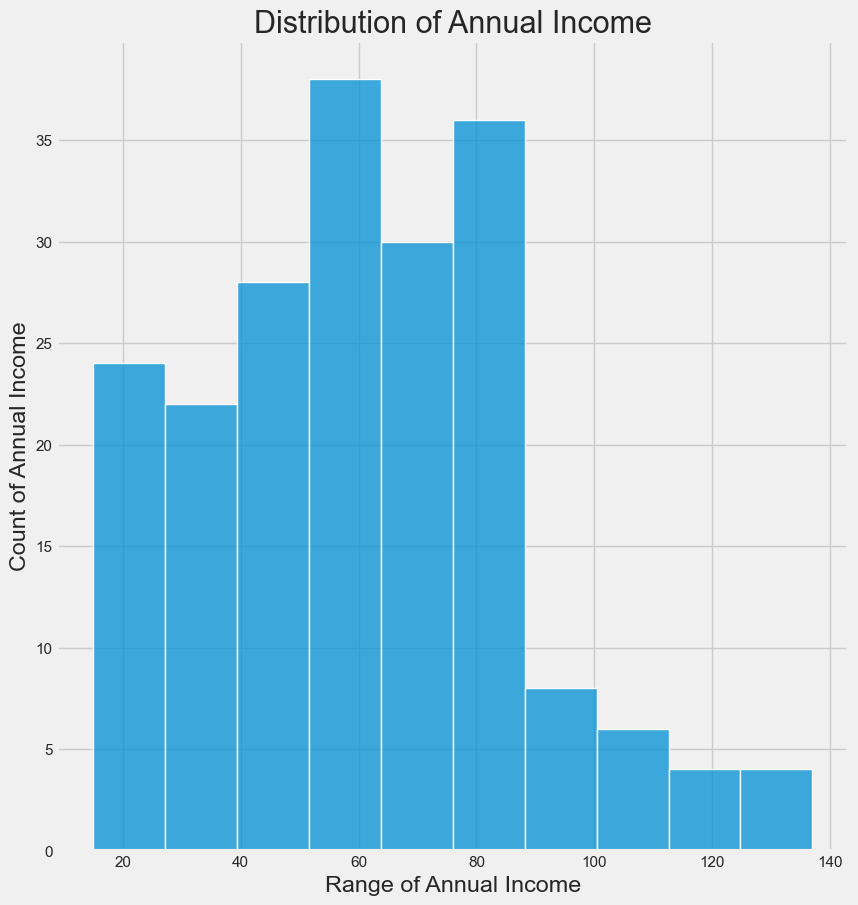

In [13]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(my_frame['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 22)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count of Annual Income')

plt.show()

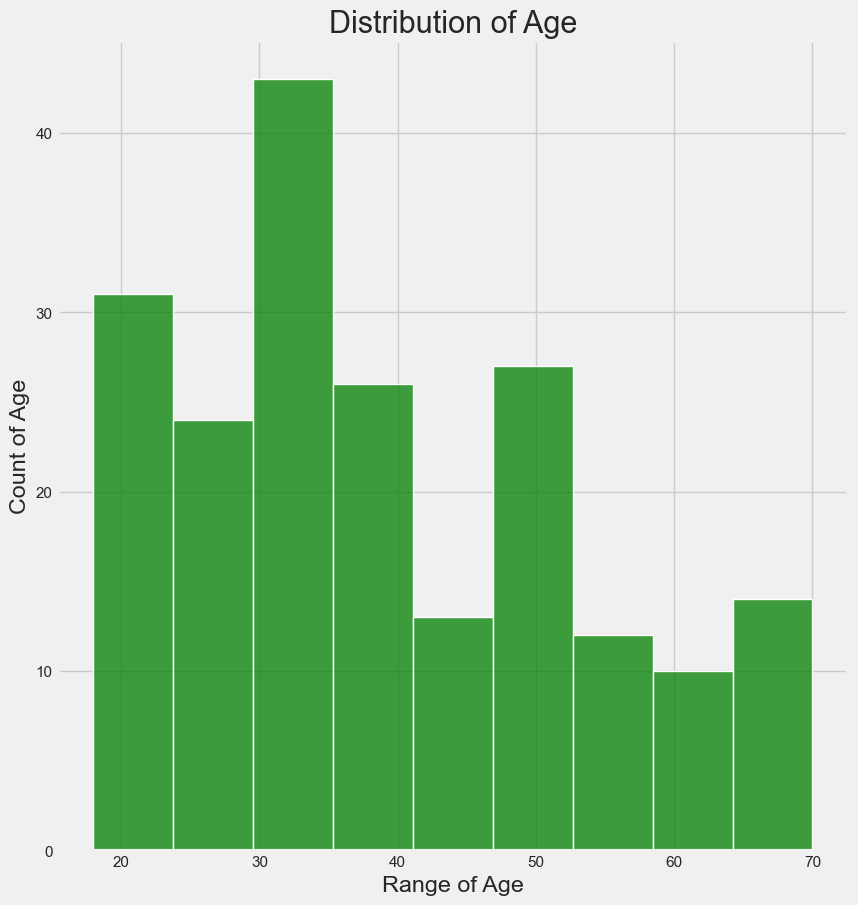

In [15]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(my_frame['Age'], color = 'green')
plt.title('Distribution of Age', fontsize = 22)
plt.xlabel('Range of Age')
plt.ylabel('Count of Age')

plt.show()

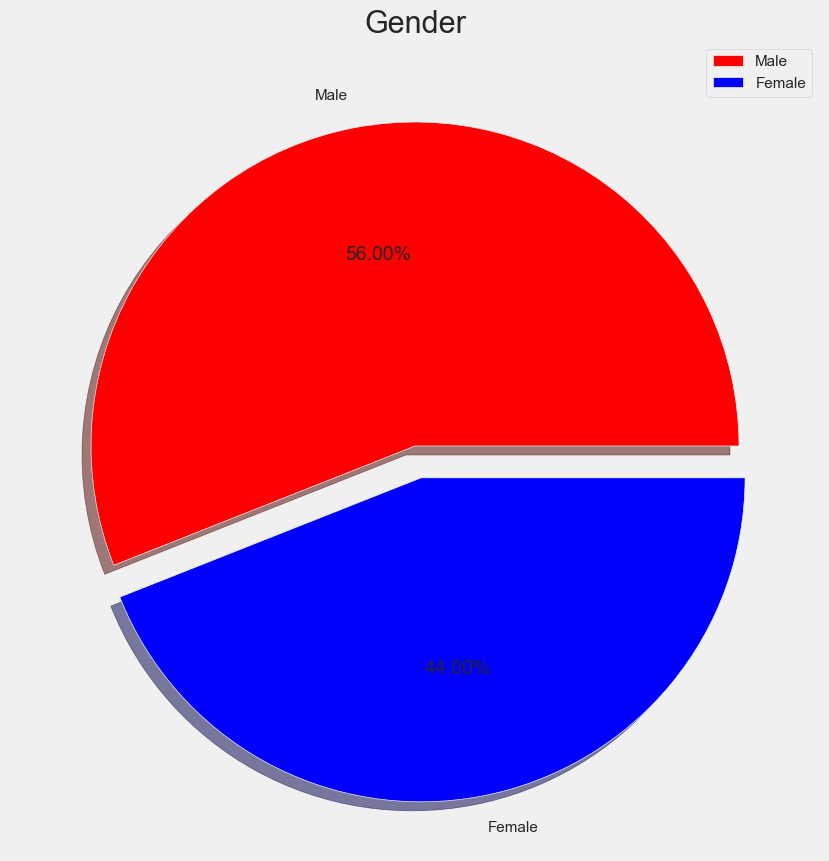

In [17]:
plt.style.use('fivethirtyeight')

genders = ['Male', 'Female']
size = my_frame['Gender'].value_counts()
my_colors = ['red', 'blue']
exp = [0, 0.1]

fig = plt.figure(figsize = (20, 10))
plt.pie(size, labels = genders, colors = my_colors, explode = exp, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 22)
plt.legend()

plt.show()

<Figure size 2000x1000 with 0 Axes>

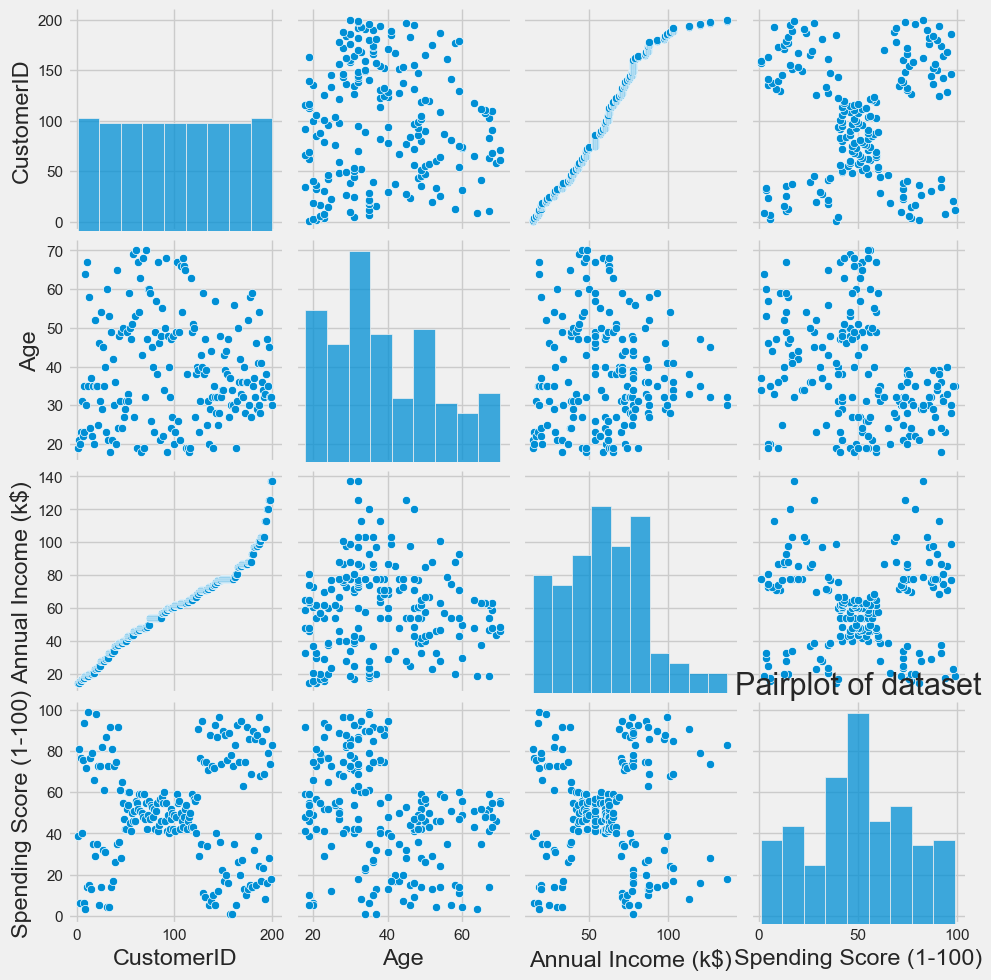

In [20]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (20, 10))

sns.pairplot(my_frame)
plt.title('Pairplot of dataset', fontsize = 22)
plt.show()

In [33]:
 x = my_frame.iloc[:, [3, 4]].values
# check the shape of x
print(x.shape)
x

(200, 2)


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [35]:
# Clusters using K-means Algorithm
from sklearn.cluster import KMeans

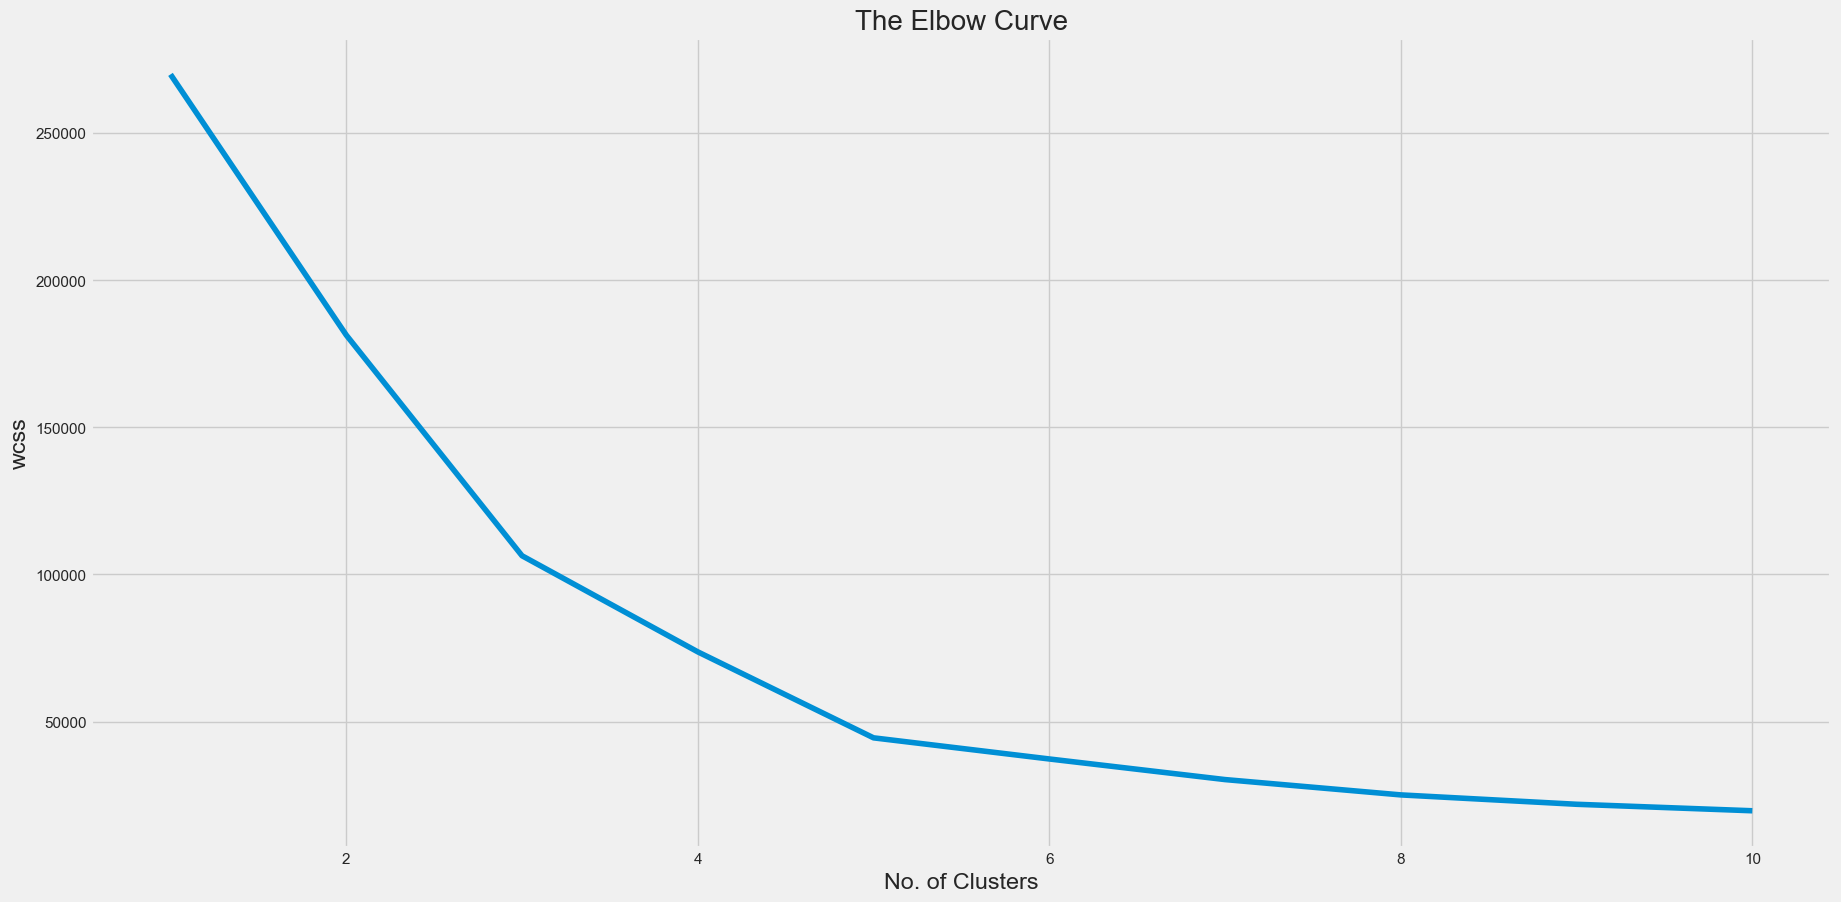

In [37]:
# Elbow Curve
fig = plt.figure(figsize = (20, 10))

wcss = [] #within cluster sum of squares
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Curve', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

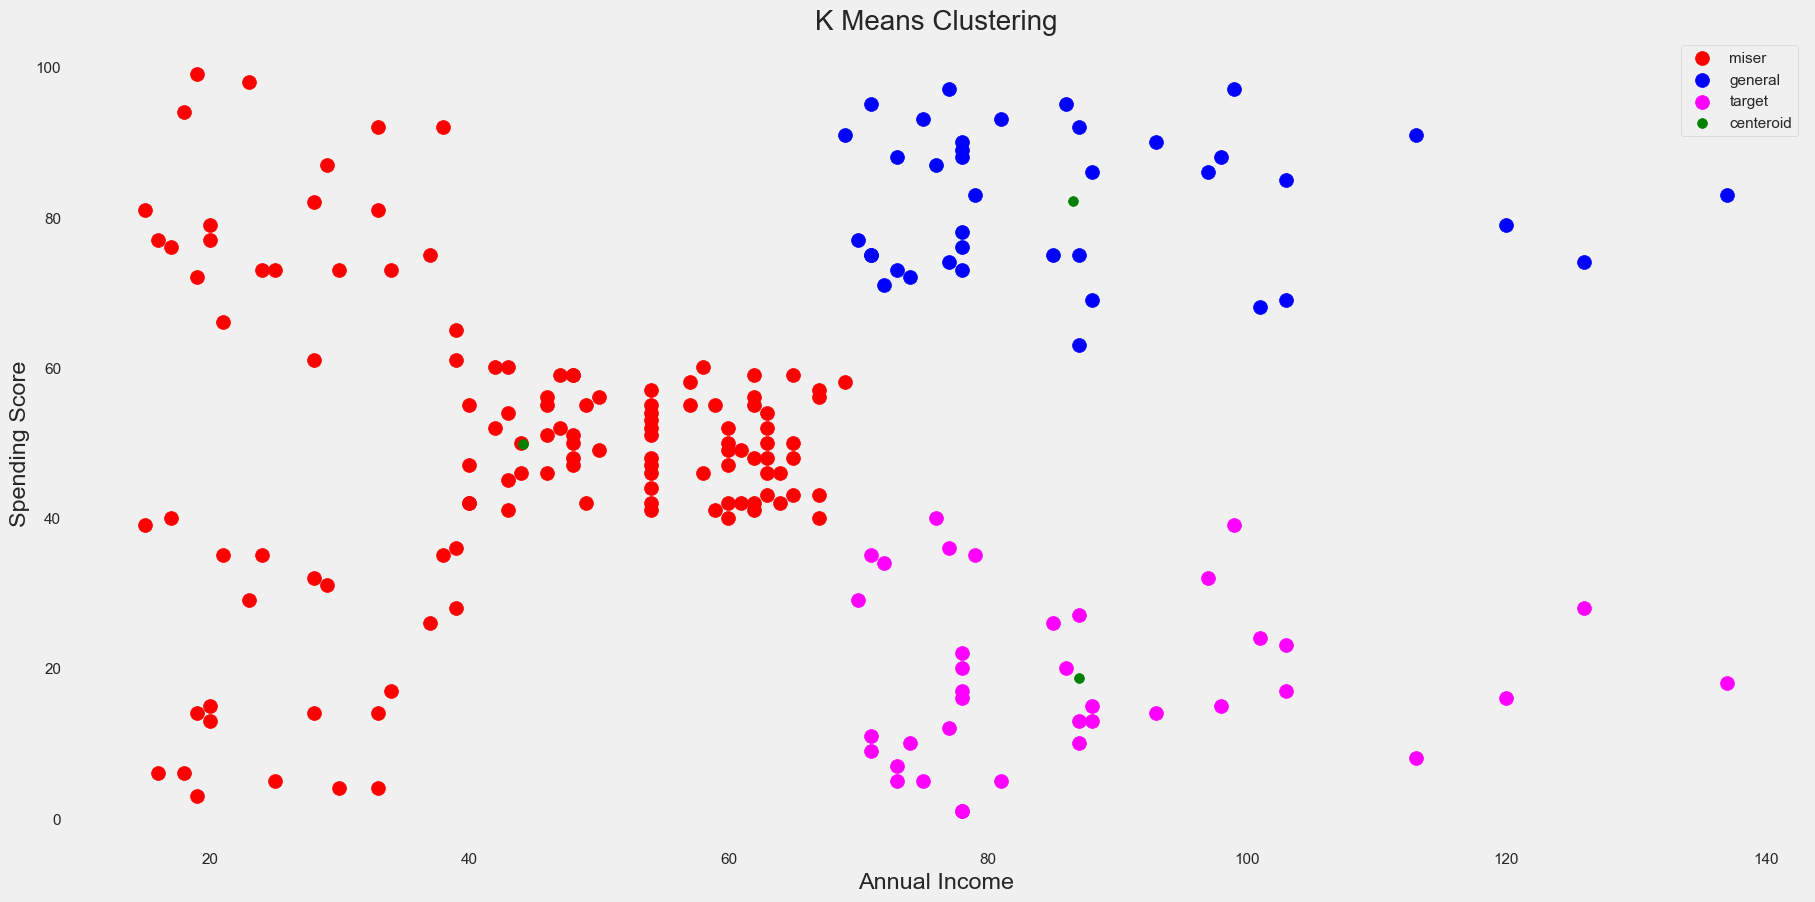

In [38]:
fig = plt.figure(figsize = (20, 10))

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'magenta', label = 'target')
# plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'pink', label = 'spendthrift')
# plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'yellow', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'green' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()